# Primera Parte: Carga de Datos

In [713]:
import pandas as pd

In [756]:
# En esta parte se carga la Data y se visualiza la cantidad de campos que se tiene en la data.
Uni=pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')
Uni.head()
Uni.info()
Uni = Uni[Uni.year == 2020]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

# Segunda Parte: Limpieza de Datos

In [757]:
#Seleccionando los campos con los que se va a trabajar.
Uni=Uni[['research_output','international_students','type','score',]]

In [758]:
#ver el numero de registros null.
Uni.isna().sum()

research_output             1
international_students     26
type                        4
score                     568
dtype: int64

In [759]:
Uni

,research_output,international_students,type,score
2928,Very High,"3,730",Private,100.0
2929,Very High,"3,879",Private,98.4
2930,Very High,"5,877",Private,97.4
2931,Very High,"8,442",Public,97.2
2932,Very High,692,Private,96.9
...,...,...,...,...
3992,High,"3,089",Public,NaN
3993,Very High,922,Public,NaN
3994,Very High,NaN,Public,NaN
3995,High,799,Public,NaN


In [760]:
#Llenando los campos nulos con la media del campo score.
Uni['score'] = Uni['score'].fillna(Uni['score'].mean())
Uni.isna().sum()

research_output            1
international_students    26
type                       4
score                      0
dtype: int64

In [761]:
#llenando de el tipo de universidad con private o public. 
import random as rd
tipos=['private','public']
def filltype(tipo):
 i=rd.randint(0,1) # rango de 0 a 1
 tipo=tipos[i]
 return tipo
Uni['type'] = Uni['type'].fillna(Uni['type'].apply(filltype))

In [762]:
Uni

,research_output,international_students,type,score
2928,Very High,"3,730",Private,100.000000
2929,Very High,"3,879",Private,98.400000
2930,Very High,"5,877",Private,97.400000
2931,Very High,"8,442",Public,97.200000
2932,Very High,692,Private,96.900000
...,...,...,...,...
3992,High,"3,089",Public,44.618563
3993,Very High,922,Public,44.618563
3994,Very High,NaN,Public,44.618563
3995,High,799,Public,44.618563


In [763]:
Uni.isna().sum()

research_output            1
international_students    26
type                       0
score                      0
dtype: int64

In [764]:
quality=['very high','medium','high','low']
def fillquality(tipo):
 i=rd.randint(0,3)
 tipo=quality[i]
 return tipo
Uni['research_output'] = Uni['research_output'].fillna(Uni['research_output'].apply(fillquality))

In [765]:
Uni.isna().sum()
#estandarizando los datos "reasearch_output y type" a minuscula
Uni['research_output']=Uni['research_output'].str.lower()
Uni['type'] = Uni['type'].str.lower()

In [766]:
Uni.head(20)

,research_output,international_students,type,score
2928,very high,"3,730",private,100.0
2929,very high,"3,879",private,98.4
2930,very high,"5,877",private,97.4
2931,very high,"8,442",public,97.2
2932,very high,692,private,96.9
2933,very high,"7,733",public,95.9
2934,very high,"7,925",public,95.0
2935,very high,"21,824",public,94.8
2936,very high,"11,143",public,94.1
2937,very high,"4,696",private,92.0


In [767]:
import re
#Limpiando los puntos y comas del campo international_students
Uni['international_students']=Uni['international_students'].str.replace(re.compile('[\.,]'),'')

In [768]:
#llenado del campo international_students con valores de rango [1000-25000]
def fillstudents(tipo):
 i=rd.randint(1000,25000)
 return str(i)
Uni['international_students']= Uni['international_students'].fillna(Uni['international_students'].apply(fillstudents))

In [769]:
#visualizacon de los campos a utilizar
Uni.isna().sum()

research_output           0
international_students    0
type                      0
score                     0
dtype: int64

In [770]:
#comvercion del campo international_students  de string a int
Uni['international_students']=Uni['international_students'].astype(int)
Uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 2928 to 3996
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   research_output         1069 non-null   object 
 1   international_students  1069 non-null   int64  
 2   type                    1069 non-null   object 
 3   score                   1069 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 41.8+ KB


# Tercera Parte: Normalizacion de Datos

In [771]:
# Desordenando la base de datos
import sklearn
Uni_shuffle = sklearn.utils.shuffle(Uni) 
Uni_shuffle.head()

,research_output,international_students,type,score
3425,very high,6229,public,24.200000
3512,very high,1751,public,44.618563
3563,very high,2270,public,44.618563
3452,high,2291,public,44.618563
3398,high,7123,public,25.100000


In [772]:
#categorizando el campo type a 0 y 1 (private, public)
Uni_shuffle['type'], categoryType = Uni_shuffle['type'].factorize(sort=True)
categoryType

Index(['private', 'public'], dtype='object')

In [773]:
Uni_shuffle.type

3425    1
3512    1
3563    1
3452    1
3398    1
       ..
3227    1
3602    1
3461    1
3677    0
3499    1
Name: type, Length: 1069, dtype: int64

In [774]:
# Categorizando el campo research_output
Uni_shuffle['research_output'], categoryReasearch = Uni_shuffle['research_output'].factorize(sort = True)
categoryResearch

Index(['high', 'low', 'medium', 'very high'], dtype='object')

In [775]:
Uni_shuffle.head()

,research_output,international_students,type,score
3425,3,6229,1,24.200000
3512,3,1751,1,44.618563
3563,3,2270,1,44.618563
3452,0,2291,1,44.618563
3398,0,7123,1,25.100000


In [776]:
# Etiquetando el campo score en intervalos
pd.cut(Uni_shuffle['score'],10,retbins = True)

(3425    (24.124, 31.78]
 3512     (39.36, 46.94]
 3563     (39.36, 46.94]
 3452     (39.36, 46.94]
 3398    (24.124, 31.78]
              ...       
 3227     (31.78, 39.36]
 3602     (39.36, 46.94]
 3461     (39.36, 46.94]
 3677     (39.36, 46.94]
 3499     (39.36, 46.94]
 Name: score, Length: 1069, dtype: category
 Categories (10, interval[float64, right]): [(24.124, 31.78] < (31.78, 39.36] < (39.36, 46.94] < (46.94, 54.52] ... (69.68, 77.26] < (77.26, 84.84] < (84.84, 92.42] < (92.42, 100.0]],
 array([ 24.1242,  31.78  ,  39.36  ,  46.94  ,  54.52  ,  62.1   ,
         69.68  ,  77.26  ,  84.84  ,  92.42  , 100.    ]))

In [777]:
# Modificando el campo score en intervalos de 10 en 10
Uni_shuffle['score'] = pd.cut(Uni_shuffle.score, [20,30,40,50,60,70,80,90,100])

In [778]:
Uni_shuffle.iloc[0:100:15]

,research_output,international_students,type,score
3425,3,6229,1,"(20, 30]"
3574,3,5211,1,"(40, 50]"
3553,3,335,1,"(40, 50]"
3127,3,3101,0,"(40, 50]"
3190,3,3526,1,"(30, 40]"
3328,3,9456,1,"(20, 30]"
3817,0,1786,0,"(40, 50]"


In [779]:
# Categorizando el campo score
Uni_shuffle['score'], categoryScore = Uni_shuffle['score'].factorize(sort = True)
categoryScore

CategoricalIndex([(20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80],
                  (80, 90], (90, 100]],
                 categories=[(20, 30], (30, 40], (40, 50], (50, 60], (60, 70], (70, 80], (80, 90], (90, 100]], ordered=True, dtype='category')

In [780]:
Uni_shuffle.head()

,research_output,international_students,type,score
3425,3,6229,1,0
3512,3,1751,1,2
3563,3,2270,1,2
3452,0,2291,1,2
3398,0,7123,1,0


In [781]:
# Modificando el campo intervalos de estudiantes en grupos de  5000
Uni_shuffle['international_students'] = pd.cut(Uni_shuffle.international_students, [0,5000,10000,15000,20000,25000,30000,32000])

In [782]:
Uni_shuffle.head()

,research_output,international_students,type,score
3425,3,"(5000, 10000]",1,0
3512,3,"(0, 5000]",1,2
3563,3,"(0, 5000]",1,2
3452,0,"(0, 5000]",1,2
3398,0,"(5000, 10000]",1,0


In [783]:
# Categorizando el campo international_students
Uni_shuffle['international_students'], categoryStudents = Uni_shuffle['international_students'].factorize(sort = True)
categoryStudents

CategoricalIndex([     (0, 5000],  (5000, 10000], (10000, 15000],
                  (15000, 20000], (20000, 25000], (25000, 30000],
                  (30000, 32000]],
                 categories=[(0, 5000], (5000, 10000], (10000, 15000], (15000, 20000], (20000, 25000], (25000, 30000], (30000, 32000]], ordered=True, dtype='category')

In [784]:
Uni_shuffle.head()

,research_output,international_students,type,score
3425,3,1,1,0
3512,3,0,1,2
3563,3,0,1,2
3452,0,0,1,2
3398,0,1,1,0


In [785]:
#Standarizando los datos
from sklearn.preprocessing import StandardScaler

In [786]:
scaler = StandardScaler()
scaler.fit(Uni_shuffle)
print(scaler.mean_)

[2.28250702 0.28905519 0.81197381 1.97006548]


In [787]:
Uni_shuffle = scaler.fit_transform(Uni_shuffle)
Uni_shuffle

array([[ 0.58271673,  1.025599  ,  0.4812139 , -1.50446918],
       [ 0.58271673, -0.41698696,  0.4812139 ,  0.02285993],
       [ 0.58271673, -0.41698696,  0.4812139 ,  0.02285993],
       ...,
       [-1.85375336,  3.91077092,  0.4812139 ,  0.02285993],
       [ 0.58271673, -0.41698696, -2.07807795,  0.02285993],
       [ 0.58271673, -0.41698696,  0.4812139 ,  0.02285993]])

In [788]:
#Separando los datos para entrenamiento y prueba
trainDatax = Uni_shuffle[:,0:3].copy()
trainDatay = Uni_shuffle[:,3:].copy()
print(trainDatay,"\n", trainDatax)

[[-1.50446918]
 [ 0.02285993]
 [ 0.02285993]
 ...
 [ 0.02285993]
 [ 0.02285993]
 [ 0.02285993]] 
 [[ 0.58271673  1.025599    0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 ...
 [-1.85375336  3.91077092  0.4812139 ]
 [ 0.58271673 -0.41698696 -2.07807795]
 [ 0.58271673 -0.41698696  0.4812139 ]]


In [789]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(trainDatax)
print(pca.explained_variance_ratio_)  

[0.40183356 0.30736115 0.29080529]


In [790]:
print(trainDatax, trainDatay)

[[ 0.58271673  1.025599    0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 ...
 [-1.85375336  3.91077092  0.4812139 ]
 [ 0.58271673 -0.41698696 -2.07807795]
 [ 0.58271673 -0.41698696  0.4812139 ]] [[-1.50446918]
 [ 0.02285993]
 [ 0.02285993]
 ...
 [ 0.02285993]
 [ 0.02285993]
 [ 0.02285993]]


In [791]:
# Entrenar la RN
import numpy as np
from sklearn.model_selection import train_test_split

In [792]:
x_train, x_test, y_train, y_test= train_test_split(trainDatax, trainDatay, test_size=0.2)

In [793]:
print(x_train[0:5], x_test[0:5], y_train[0:5], y_test[0:5])

[[-1.85375336 -0.41698696  0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 [-0.22943997 -0.41698696 -2.07807795]
 [ 0.58271673 -0.41698696  0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]] [[ 0.58271673  1.025599    0.4812139 ]
 [ 0.58271673 -0.41698696  0.4812139 ]
 [-1.85375336 -0.41698696 -2.07807795]
 [-0.22943997 -0.41698696 -2.07807795]
 [ 0.58271673 -0.41698696  0.4812139 ]] [[-1.50446918]
 [-1.50446918]
 [-1.50446918]
 [ 0.02285993]
 [ 0.02285993]] [[-0.74080462]
 [-0.74080462]
 [ 0.02285993]
 [-1.50446918]
 [ 0.02285993]]


In [794]:
#import numpy as np

def sigmoide(x):
  return (1.0/(1.0+np.exp(-x)))
def derivada(x):
  return sigmoide(x)*(1.0-sigmoide(x))

def neurona(
    entrada, pesosCO1, tendenciasC01, pesosCO2, tendenciasCO2 
    ,pesosCO3, tendenciasCO3, pesosCO4, tendenciasCO4
    ,pesosCO5, tendenciasCO5, pesosCO6, tendenciasCO6
    ,pesosCO7, tendenciasCO7, pesosCO8, tendenciasCO8
    ,pesosCO9, tendenciasCO9, pesosCO10, tendenciasCO10
    ,pesosCO11, tendenciasCO11, pesosCO12, tendenciasCO12
    ,pesosCS, tendenciasCS):
  entradaNetaC1=np.dot(pesosCO1, np.transpose(entrada))-tendenciasC01
  salidaC1=sigmoide(entradaNetaC1)

  entradaNetaC2 = np.dot(pesosCO2,salidaC1)-tendenciasCO2
  salidaC2=sigmoide(entradaNetaC2)

  entradaNetaC3 = np.dot(pesosCO3,salidaC2)-tendenciasCO3
  salidaC3=sigmoide(entradaNetaC3)
    
  entradaNetaC4 = np.dot(pesosCO4,salidaC3)-tendenciasCO4
  salidaC4=sigmoide(entradaNetaC4)
    
  entradaNetaC5 = np.dot(pesosCO5,salidaC4)-tendenciasCO5
  salidaC5=sigmoide(entradaNetaC5)

  entradaNetaC6 = np.dot(pesosCO6,salidaC5)-tendenciasCO6
  salidaC6=sigmoide(entradaNetaC6)
    
  entradaNetaC7 = np.dot(pesosCO7,salidaC6)-tendenciasCO7
  salidaC7=sigmoide(entradaNetaC7)
    
  entradaNetaC8 = np.dot(pesosCO8,salidaC7)-tendenciasCO8
  salidaC8=sigmoide(entradaNetaC8)
    
  entradaNetaC9 = np.dot(pesosCO9,salidaC8)-tendenciasCO9
  salidaC9=sigmoide(entradaNetaC9)
    
  entradaNetaC10 = np.dot(pesosCO10,salidaC9)-tendenciasCO10
  salidaC10=sigmoide(entradaNetaC10)
    
  entradaNetaC11 = np.dot(pesosCO11,salidaC10)-tendenciasCO11
  salidaC11=sigmoide(entradaNetaC11)
    
  entradaNetaC12 = np.dot(pesosCO12,salidaC11)-tendenciasCO12
  salidaC12=sigmoide(entradaNetaC12)

  entradaNetaCS = np.dot(pesosCS,salidaC3)-tendenciasCS
  salida=sigmoide(entradaNetaCS)

  return salida, entradaNetaCS, entradaNetaC12,entradaNetaC11,entradaNetaC10,entradaNetaC9,entradaNetaC8,entradaNetaC7, entradaNetaC6, entradaNetaC5,entradaNetaC4,entradaNetaC3,entradaNetaC2,entradaNetaC1
# el algoritmo recibe
# FacorAprendizaje: que tanto se permite el cambio en los pesos w(t) = e*error'f'(neta)*xj
# error: un valor de error que permitimos
# entradas: el conjunto de entradas que se van a trabajar 
# salidas: salidas esperadas
# max-it: el numero de iteraciones que prmitimos
# alpha: el valor de incremento del factor de aprendzaje
# rho: El valor de decremento del factor de aprendizaje
# neuronasC1: numero de neuronas en la capa oculta 1
# neuronasC2: numero de neuronas en la capa oculta 2
# neuronasC3: numero de neuronas en la capa oculta 3
def backpropagation(entradas, salidas,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3,neuronasC4, neuronasC5, neuronasC6,neuronasC7, neuronasC8, neuronasC9,neuronasC10, neuronasC11, neuronasC12):

  pesosCO1=2*np.random.rand(neuronasC1,entradas.shape[1])-1
  tendenciasC1=2*np.random.rand(neuronasC1)-1

  pesosCO2=2*np.random.rand(neuronasC2,neuronasC1)-1
  tendenciasC2=2*np.random.rand(neuronasC2)-1

  pesosCO3=2*np.random.rand(neuronasC3,neuronasC2)-1
  tendenciasC3=2*np.random.rand(neuronasC3)-1
    
  pesosCO4=2*np.random.rand(neuronasC4,neuronasC3)-1
  tendenciasC4=2*np.random.rand(neuronasC4)-1
  
  pesosCO5=2*np.random.rand(neuronasC5,neuronasC4)-1
  tendenciasC5=2*np.random.rand(neuronasC5)-1

  pesosCO6=2*np.random.rand(neuronasC6,neuronasC5)-1
  tendenciasC6=2*np.random.rand(neuronasC6)-1
 
  pesosCO7=2*np.random.rand(neuronasC7,neuronasC6)-1
  tendenciasC7=2*np.random.rand(neuronasC7)-1

  pesosCO8=2*np.random.rand(neuronasC8,neuronasC7)-1
  tendenciasC8=2*np.random.rand(neuronasC8)-1
    
  pesosCO9=2*np.random.rand(neuronasC9,neuronasC8)-1
  tendenciasC9=2*np.random.rand(neuronasC9)-1
    
  pesosCO10=2*np.random.rand(neuronasC10,neuronasC9)-1
  tendenciasC10=2*np.random.rand(neuronasC10)-1

  pesosCO11=2*np.random.rand(neuronasC11,neuronasC10)-1
  tendenciasC11=2*np.random.rand(neuronasC11)-1
    
  pesosCO12=2*np.random.rand(neuronasC12,neuronasC11)-1
  tendenciasC12=2*np.random.rand(neuronasC12)-1
     
  pesosCS = 2*np.random.rand(neuronasC12)-1
  #pesosCS = 2*np.random.rand(salidas.shape[1],neuronasC12)-1 #mas de una salida
  tendenciasCS=2*np.random.rand(1)-1
  it=0
  errorVec=[]
  errorAnt=float('inf')
  while(it<max_it):
    it+=1
    errorIt=0
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC12,entradaNetaC11,entradaNetaC10,entradaNetaC9,entradaNetaC8,entradaNetaC7,entradaNetaC6,entradaNetaC5,entradaNetaC4,entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3, pesosCO4, tendenciasC4,pesosCO5, tendenciasC5,pesosCO6, tendenciasC6,pesosCO7, tendenciasC7,pesosCO8, tendenciasC8,pesosCO9, tendenciasC9,pesosCO10, tendenciasC10,pesosCO11, tendenciasC11,pesosCO12, tendenciasC12,pesosCS, tendenciasCS
        )

      errorIt+=np.power(t-y,2)/2.0
      #np.sum(np.power(t-y,2)/2.0)

    errorVec.append(errorIt)
    for i in range(0, entradas.shape[0]):
      ent=entradas[i]
      t=salidas[i]
      y,entradaNetaCS, entradaNetaC12,entradaNetaC11,entradaNetaC10,entradaNetaC9,entradaNetaC8,entradaNetaC7,entradaNetaC6,entradaNetaC5,entradaNetaC4,entradaNetaC3, entradaNetaC2, entradaNetaC1=neurona(
          ent, pesosCO1, tendenciasC1, pesosCO2, tendenciasC2,pesosCO3, tendenciasC3, pesosCO4, tendenciasC4,pesosCO5, tendenciasC5,pesosCO6, tendenciasC6,pesosCO7, tendenciasC7,pesosCO8, tendenciasC8,pesosCO9, tendenciasC9,pesosCO10, tendenciasC10,pesosCO11, tendenciasC11,pesosCO12, tendenciasC12,pesosCS, tendenciasCS
      )

      # calcular el error en la https://meet.google.com/poh-rbpy-vtv?authuser=0capa salida
      errorCS=(t-y)*derivada(entradaNetaCS)
      #error = np.sum(3rroCS)

      errorC12=0
      for j in range(0,pesosCS.shape[0]):
        #for k in range(...)
        errorC12+=pesosCS[j]*errorCS*derivada(entradaNetaC12[j])

      errorC11=0
      for j in range(0,pesosCO12.shape[0]):
        for k in range(0, pesosCO12.shape[1]):
          errorC11 += pesosCO12[j][k]*errorC12*derivada(entradaNetaC11[k])
        
      errorC10=0
      for j in range(0,pesosCO11.shape[0]):
        for k in range(0, pesosCO11.shape[1]):
          errorC10 += pesosCO11[j][k]*errorC11*derivada(entradaNetaC10[k])
        
      errorC9=0
      for j in range(0,pesosCO10.shape[0]):
        for k in range(0, pesosCO10.shape[1]):
          errorC9 += pesosCO10[j][k]*errorC10*derivada(entradaNetaC9[k])
        
      errorC8=0
      for j in range(0,pesosCO9.shape[0]):
        for k in range(0, pesosCO9.shape[1]):
          errorC8 += pesosCO9[j][k]*errorC9*derivada(entradaNetaC8[k])
        
      errorC7=0
      for j in range(0,pesosCO8.shape[0]):
        for k in range(0, pesosCO8.shape[1]):
          errorC7 += pesosCO8[j][k]*errorC8*derivada(entradaNetaC7[k])
        
      errorC6=0
      for j in range(0,pesosCO7.shape[0]):
        for k in range(0, pesosCO7.shape[1]):
          errorC6 += pesosCO7[j][k]*errorC7*derivada(entradaNetaC6[k])
        
      errorC5=0
      for j in range(0,pesosCO6.shape[0]):
        for k in range(0, pesosCO6.shape[1]):
          errorC5 += pesosCO6[j][k]*errorC6*derivada(entradaNetaC5[k])
        
      errorC4=0
      for j in range(0,pesosCO5.shape[0]):
        for k in range(0, pesosCO5.shape[1]):
          errorC4 += pesosCO5[j][k]*errorC5*derivada(entradaNetaC4[k])
        
      errorC3=0
      for j in range(0,pesosCO4.shape[0]):
        for k in range(0, pesosCO4.shape[1]):
          errorC3 += pesosCO4[j][k]*errorC4*derivada(entradaNetaC3[k])

      #calcular el error capa oculta 2
      errorC2=0
      for j in range(0,pesosCO3.shape[0]):
        for k in range(0, pesosCO3.shape[1]):
          errorC2 += pesosCO3[j][k]*errorC3*derivada(entradaNetaC2[k])

      #Calcular el error de la capa oculta 1
      errorC1=0
      for j in range(0, pesosCO2.shape[0]):
        for k in range(0, pesosCO2.shape[1]):
          errorC1 += pesosCO2[j][k]*errorC2*derivada(entradaNetaC1[k])

      # actualiza pesos
      # cada salida
      for j in range(0, pesosCS.shape[0]):
        pesosCS[j]+=factorAprendizaje*errorCS*entradaNetaCS

      #Actualizar las tendencias
      for j in range(0,tendenciasCS.shape[0]):
        tendenciasCS[j]+=factorAprendizaje*errorCS*(-1)
        
      #pesos capa oculta 12
      for j in range(0, pesosCO12.shape[0]): #neurona de CO3
        for k in range(0, pesosCO12.shape[1]): #Salida de la CO2
          pesosCO12[j][k] += factorAprendizaje*errorC12*entradaNetaC12[j]
      # 
      # actualizar las tendencias 12
      for j in range(0, tendenciasC12.shape[0]):
        tendenciasC12[j]+=factorAprendizaje*errorC12*(-1)
        
      #pesos capa oculta 11
      for j in range(0, pesosCO11.shape[0]): #neurona de CO3
        for k in range(0, pesosCO11.shape[1]): #Salida de la CO2
          pesosCO11[j][k]+=factorAprendizaje*errorC11*entradaNetaC11[j]
      # 
      # actualizar las tendencias 11
      for j in range(0, tendenciasC11.shape[0]):
        tendenciasC11[j]+=factorAprendizaje*errorC11*(-1)
        
      #pesos capa oculta 10
      for j in range(0, pesosCO10.shape[0]): #neurona de CO3
        for k in range(0, pesosCO10.shape[1]): #Salida de la CO2
          pesosCO10[j][k]+=factorAprendizaje*errorC10*entradaNetaC10[j]
      # 
      # actualizar las tendencias 10
      for j in range(0, tendenciasC10.shape[0]):
        tendenciasC10[j]+=factorAprendizaje*errorC10*(-1)
        
      #pesos capa oculta 9
      for j in range(0, pesosCO9.shape[0]): #neurona de CO3
        for k in range(0, pesosCO9.shape[1]): #Salida de la CO2
          pesosCO9[j][k]+=factorAprendizaje*errorC9*entradaNetaC9[j]
      # 
      # actualizar las tendencias 9
      for j in range(0, tendenciasC9.shape[0]):
        tendenciasC9[j]+=factorAprendizaje*errorC9*(-1)

      #pesos capa oculta 8
      for j in range(0, pesosCO8.shape[0]): #neurona de CO3
        for k in range(0, pesosCO8.shape[1]): #Salida de la CO2
          pesosCO8[j][k]+=factorAprendizaje*errorC8*entradaNetaC8[j]
      # 
      # actualizar las tendencias 8
      for j in range(0, tendenciasC8.shape[0]):
        tendenciasC8[j]+=factorAprendizaje*errorC8*(-1)
        
      #pesos capa oculta 7
      for j in range(0, pesosCO7.shape[0]): #neurona de CO3
        for k in range(0, pesosCO7.shape[1]): #Salida de la CO2
          pesosCO7[j][k]+=factorAprendizaje*errorC7*entradaNetaC7[j]
      # 
      # actualizar las tendencias 7
      for j in range(0, tendenciasC7.shape[0]):
        tendenciasC7[j]+=factorAprendizaje*errorC7*(-1)
        
      #pesos capa oculta 6
      for j in range(0, pesosCO6.shape[0]): #neurona de CO3
        for k in range(0, pesosCO6.shape[1]): #Salida de la CO2
          pesosCO6[j][k]+=factorAprendizaje*errorC6*entradaNetaC6[j]
      # 
      # actualizar las tendencias 6
      for j in range(0, tendenciasC6.shape[0]):
        tendenciasC6[j]+=factorAprendizaje*errorC6*(-1)

      #pesos capa oculta 5
      for j in range(0, pesosCO5.shape[0]): #neurona de CO3
        for k in range(0, pesosCO5.shape[1]): #Salida de la CO2
          pesosCO5[j][k]+=factorAprendizaje*errorC5*entradaNetaC5[j]
      # 
      # actualizar las tendencias 5
      for j in range(0, tendenciasC5.shape[0]):
        tendenciasC5[j]+=factorAprendizaje*errorC5*(-1)
        
      #pesos capa oculta 4
      for j in range(0, pesosCO4.shape[0]): #neurona de CO3
        for k in range(0, pesosCO4.shape[1]): #Salida de la CO2
          pesosCO4[j][k]+=factorAprendizaje*errorC4*entradaNetaC4[j]
      # 
      # actualizar las tendencias 4
      for j in range(0, tendenciasC4.shape[0]):
        tendenciasC4[j]+=factorAprendizaje*errorC4*(-1)
      
      #pesos capa oculta 3
      for j in range(0, pesosCO3.shape[0]): #neurona de CO3
        for k in range(0, pesosCO3.shape[1]): #Salida de la CO2
          pesosCO3[j][k]+=factorAprendizaje*errorC3*entradaNetaC3[j]
      # 
      # actualizar las tendencias 3
      for j in range(0, tendenciasC3.shape[0]):
        tendenciasC3[j]+=factorAprendizaje*errorC3*(-1)

      #pesos capa oculta 2
      for j in range(0, pesosCO2.shape[0]): #neurona de CO2
        for k in range(0, pesosCO2.shape[1]): #Salida de la CO1
          pesosCO2[j][k]+=factorAprendizaje*errorC2*entradaNetaC2[j]
      # 
      # actualizar las tendencias 2
      for j in range(0, tendenciasC2.shape[0]):
        tendenciasC2[j]+=factorAprendizaje*errorC2*(-1)

      # Pesos capa oculta 1
      for j in range(0, pesosCO1.shape[0]):
        for k in range(0, pesosCO1.shape[1]):
          pesosCO1[j][k]+=factorAprendizaje*errorC1*entradaNetaC1[j]

      #Actualizar las tendencias 1
      for j in range(0,tendenciasC1.shape[0]):
        tendenciasC1[j]+=factorAprendizaje*errorC1*(-1)

    if errorIt < errorAnt:
      factorAprendizaje*=alpha
  else:
    factorAprendizaje*=rho
  errorAnt=errorIt
  return pesosCS, pesosCO1, pesosCO2, pesosCO3, pesosCO4, pesosCO5, pesosCO6, pesosCO7, pesosCO8, pesosCO9, pesosCO10, pesosCO11, pesosCO12, tendenciasC1, tendenciasC2, tendenciasC3, tendenciasC4, tendenciasC5, tendenciasC6, tendenciasC7, tendenciasC8, tendenciasC9, tendenciasC10, tendenciasC11, tendenciasC12, tendenciasCS, errorVec


In [810]:
# parametros
neuronasC1=5
neuronasC2=6 
neuronasC3=6
neuronasC4=6
neuronasC5=6
neuronasC6=6
neuronasC7=6
neuronasC8=6
neuronasC9=6
neuronasC10=6
neuronasC11=6
neuronasC12=6
factorAprendizaje=1.5
alpha=1.05# aumentar el factor de aprendizaje 
rho=0.90 #disminuir el factor de aprendizaje
max_it=10
error=0.1

In [808]:
# x_train, x_test, y_train, y_test
pesosCS, pesosCO12, pesosCO11, pesosCO10,pesosCO9, pesosCO8, pesosCO7,pesosCO6, pesosCO5, pesosCO4,pesosCO3, pesosCO2, pesosCO1, tc12, tc11, tc10,tc9, tc8, tc7,tc6, tc5, tc4,tc3, tc2, tc1, tcs, errorVec=backpropagation(
    x_train, y_train,factorAprendizaje, error, max_it, alpha, rho, neuronasC1, neuronasC2, neuronasC3, neuronasC4, neuronasC5, neuronasC6, neuronasC7, neuronasC8, neuronasC9, neuronasC10, neuronasC11, neuronasC12)

Text(0.5, 1.0, 'Error de entrenamiento')

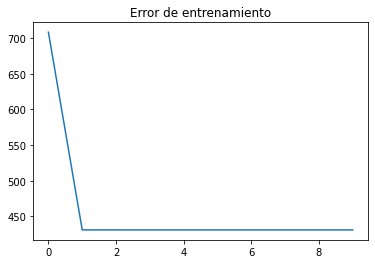

In [809]:
import matplotlib.pyplot as plt
plt.plot(errorVec)
plt.title("Error de entrenamiento")